In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
delhi=pd.read_csv("https://raw.githubusercontent.com/benvictoria21/pandas/master/dataset/testset.csv")
delhi.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


In [5]:
delhi.drop([' _precipm',' _pressurem',' _heatindexm',' _hum',' _thunder',' _tornado',' _vism',' _wdird',' _wdire',' _wgustm',' _windchillm',' _wspdm'],axis='columns',inplace=True)
delhi.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_rain,_snow,_tempm
0,19961101-11:00,Smoke,9.0,0,0,0,0,30.0
1,19961101-12:00,Smoke,10.0,0,0,0,0,28.0
2,19961101-13:00,Smoke,11.0,0,0,0,0,24.0
3,19961101-14:00,Smoke,10.0,0,0,0,0,24.0
4,19961101-16:00,Smoke,11.0,0,0,0,0,23.0


In [6]:
delhi['datetime_utc']=pd.to_datetime(delhi['datetime_utc'])
delhi['datetime_utc'].head()

0   1996-11-01 11:00:00
1   1996-11-01 12:00:00
2   1996-11-01 13:00:00
3   1996-11-01 14:00:00
4   1996-11-01 16:00:00
Name: datetime_utc, dtype: datetime64[ns]

In [7]:
delhi.isnull().sum()

datetime_utc      0
 _conds          72
 _dewptm        621
 _fog             0
 _hail            0
 _rain            0
 _snow            0
 _tempm         673
dtype: int64

In [23]:
delhi.dropna(0,inplace=True)
delhi.isnull().sum()

datetime_utc    0
 _conds         0
 _dewptm        0
 _fog           0
 _hail          0
 _rain          0
 _snow          0
 _tempm         0
dtype: int64

In [9]:
delhiplot=delhi[['datetime_utc',' _tempm']].copy()
delhiplot['just_date'] = delhiplot['datetime_utc'].dt.date

delhifinal=delhiplot.drop('datetime_utc',axis=1)



delhifinal.set_index('just_date', inplace= True)

delhifinal.head()

,_tempm
just_date,
1996-11-01,30.0
1996-11-01,28.0
1996-11-01,24.0
1996-11-01,24.0
1996-11-01,23.0


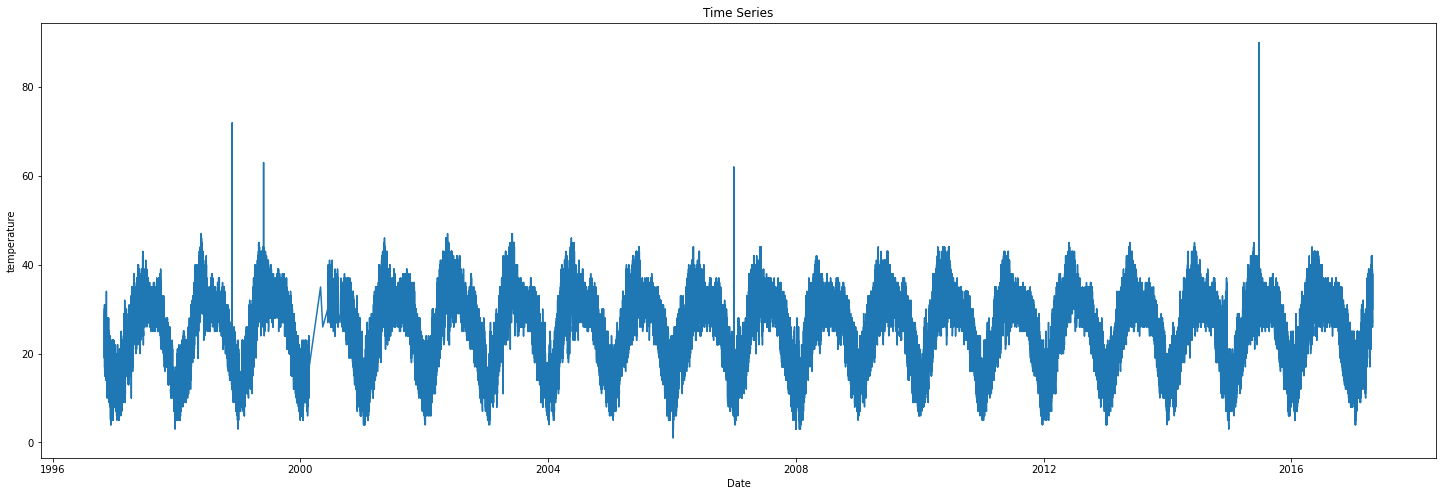

In [10]:
plt.figure(figsize=(25,8))
plt.plot(delhifinal)
plt.title('Time Series')
plt.xlabel('Date')
plt.ylabel('temperature')
plt.show()

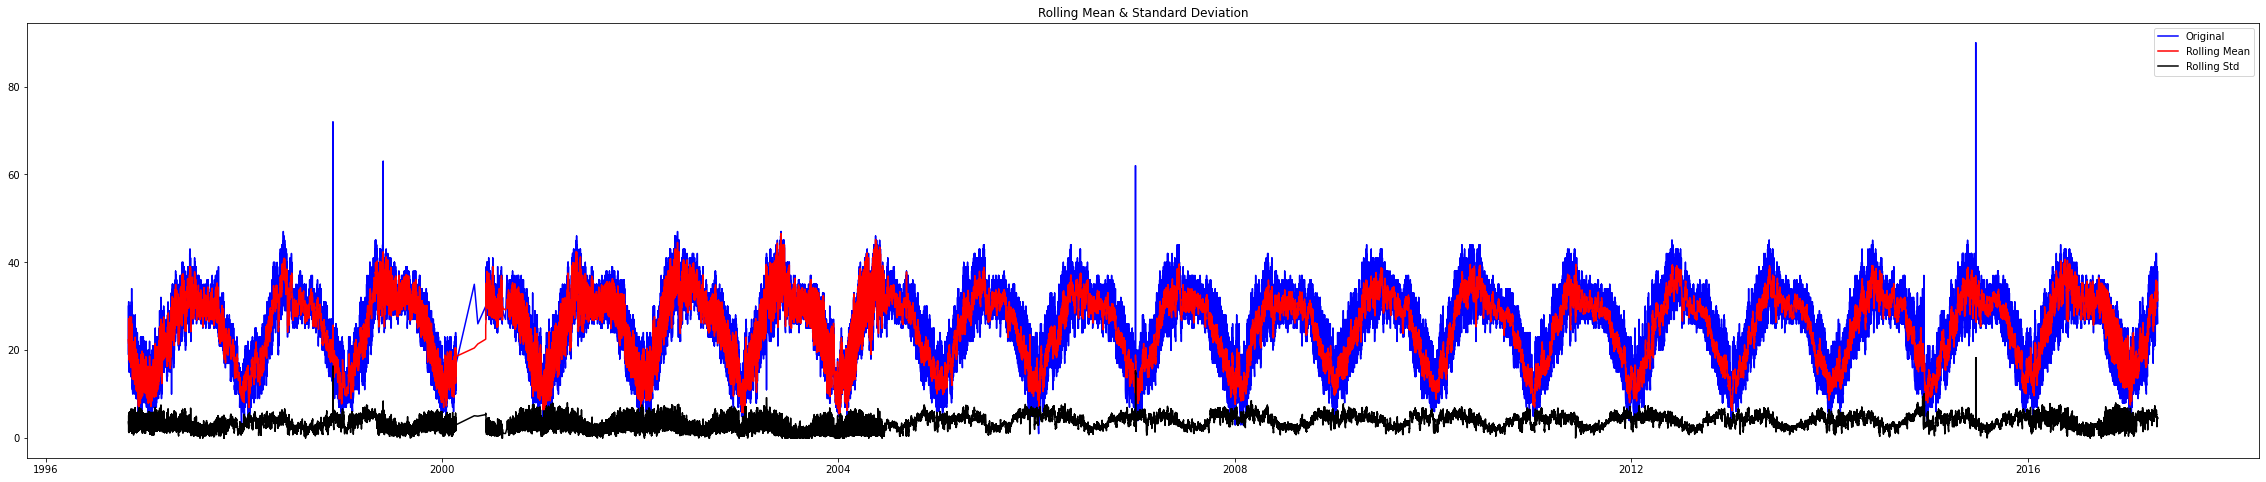

Results of :
Test Statistic                -7.581690e+00
p-value                        2.671478e-11
#Lags Used                     6.800000e+01
Number of Observations Used    1.001180e+05
Critical Value (1%)           -3.430415e+00
Critical Value (5%)           -2.861569e+00
Critical Value (10%)          -2.566785e+00
dtype: float64


In [12]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of :')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
plt.figure(figsize=(40,8))
test_stationarity(delhifinal)

In [13]:
cond=delhi[' _conds'].unique()
for values in cond:
    print(values)

Smoke
Clear
Haze
Unknown
Scattered Clouds
Shallow Fog
Mostly Cloudy
Fog
Partly Cloudy
Patches of Fog
Thunderstorms and Rain
Overcast
Rain
Light Rain
Light Drizzle
Drizzle
Mist
Thunderstorm
Light Thunderstorms and Rain
Light Thunderstorm
Squalls
Heavy Rain
Light Haze
Widespread Dust
Funnel Cloud
Heavy Thunderstorms and Rain
Heavy Thunderstorms with Hail
Light Rain Showers
Volcanic Ash
Thunderstorms with Hail
Partial Fog
Light Fog
Heavy Fog
Blowing Sand
Sandstorm
Light Hail Showers
Light Sandstorm
Rain Showers


In [14]:
smoke=delhi[' _conds'][delhi[' _conds'] == 'Smoke'].count()
print(smoke)

20615


In [15]:
rain=delhi[' _conds'][delhi[' _conds'] == 'Rain'].count()
print(rain)

389


In [16]:
clear=delhi[' _conds'][delhi[' _conds'] == 'Clear'].count()
print(clear)

3108


In [17]:
fog=delhi[' _conds'][delhi[' _conds'] == 'Fog'].count()
print(fog)

2715


In [19]:
Mist=delhi[' _conds'][delhi[' _conds'] == 'Mist'].count()
print(Mist)

9349


In [20]:
Dust=delhi[' _conds'][delhi[' _conds'] == 'Widespread Dust'].count()
print(Dust)

2844


In [21]:
Heavy=delhi[' _conds'][delhi[' _conds'] == 'Heavy Fog'].count()
print(Heavy)

421


Text(0.5, 0.98, 'Categorical Plotting')

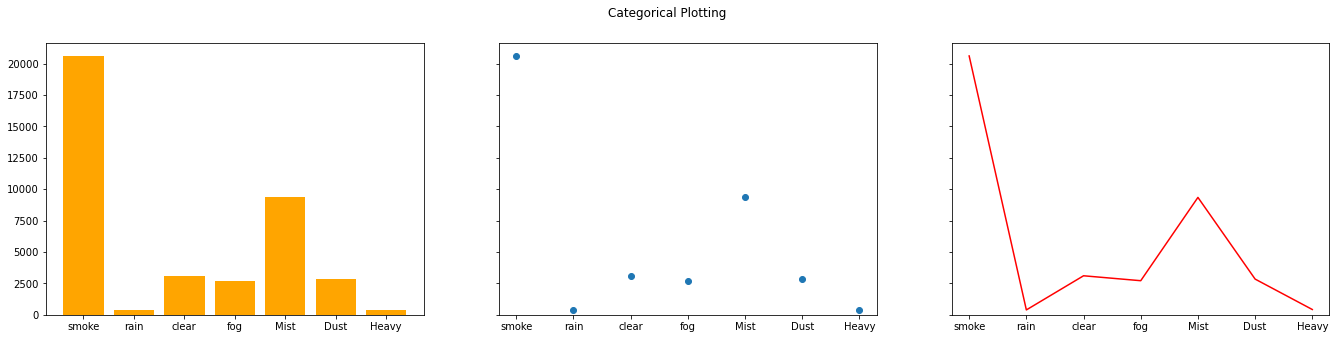

In [22]:
data = {'smoke': smoke,'rain':rain,'clear':clear,'fog':fog,'Mist':Mist,'Dust':Dust,'Heavy':Heavy}
names = list(data.keys())
values = list(data.values())

fig, axs = plt.subplots(1, 3, figsize=(23, 5), sharey=True)
axs[0].bar(names, values,color='Orange')
axs[1].scatter(names, values)
axs[2].plot(names, values, color='Red')
fig.suptitle('Categorical Plotting')